In [17]:
import sys
import numpy as np
from matplotlib import pyplot as plt

from code import Outputs
sys.path.append("../../benchmark/")
from utilities import complete_panel, myblue, myred

# Velocity distribution

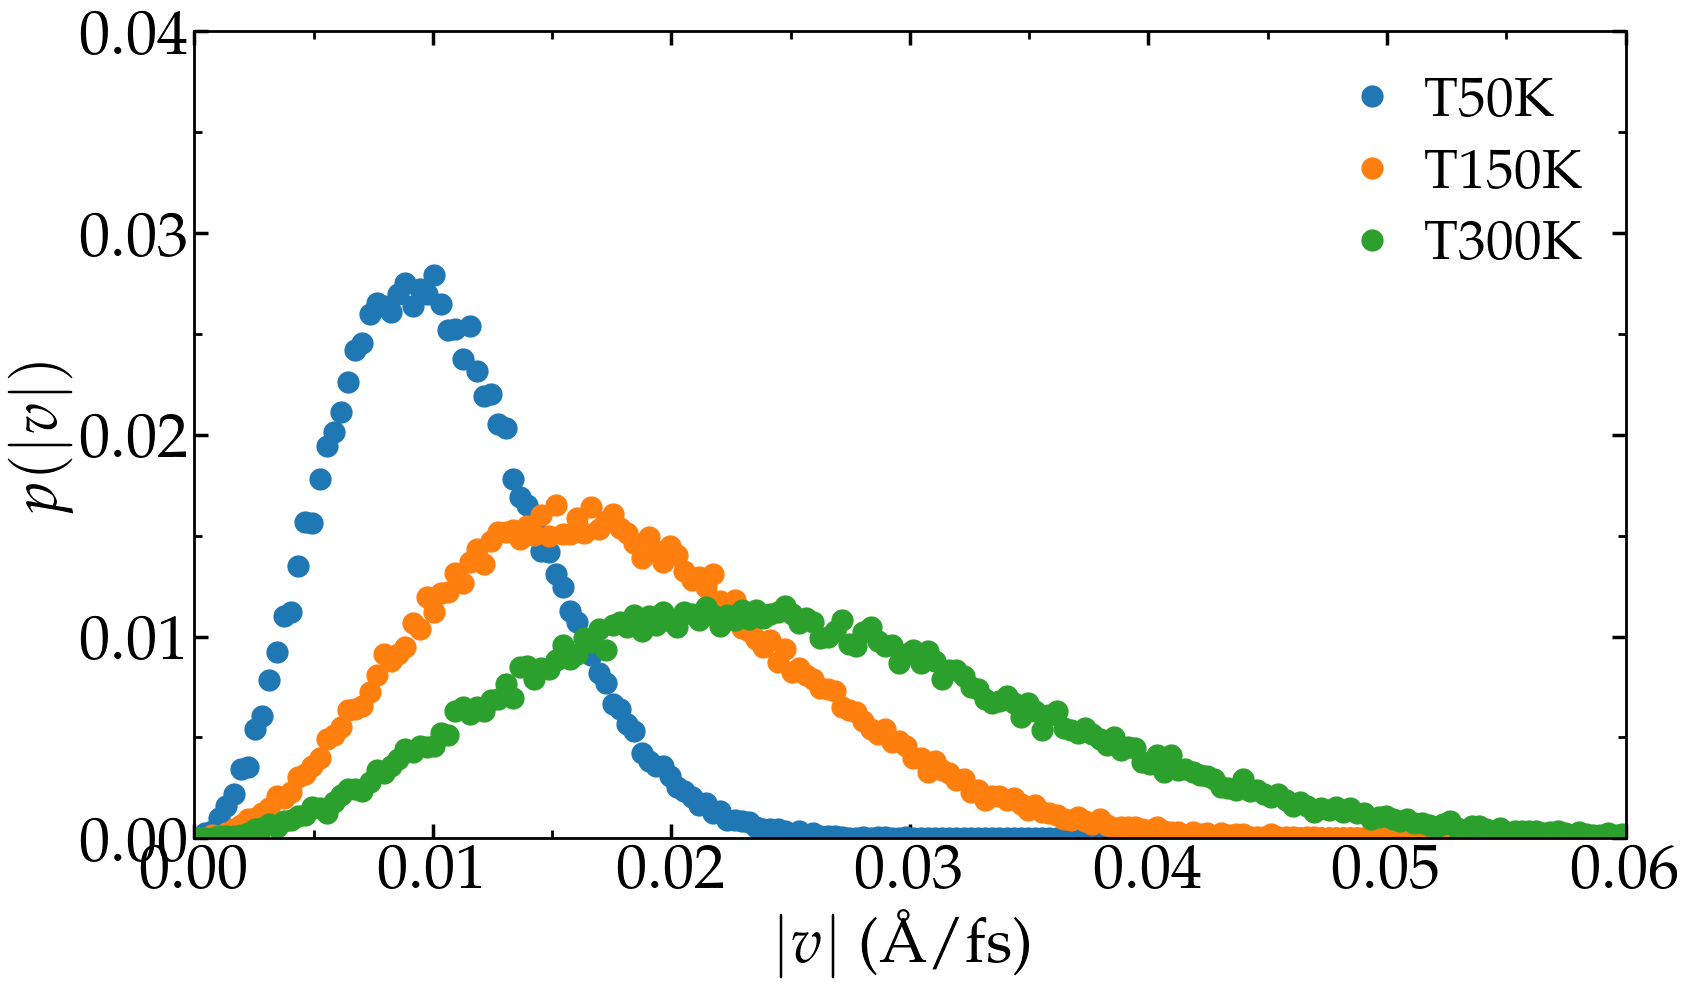

In [42]:
fig = plt.figure(figsize=(17,10))

ax = []
n = 0
l_tot = 1
c_tot = 1

x_boundaries = 0, 0.06
x_ticks = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]
y_boundaries = 0, 0.04
y_ticks = [0, 0.01, 0.02, 0.03, 0.04]

n += 1
ax.append(plt.subplot(l_tot, c_tot, n))

for temperature in [50, 150, 300]:
    x = Outputs(number_atoms=50000,
                Lx=12,
                desired_temperature=temperature,
                seed=69817,
                )
    x.write_lammps_data()

    velocity = x.atoms_velocities*x.reference_distance/x.reference_time
    norm_velocity = np.sqrt(velocity.T[0]**2 + velocity.T[1]**2 + velocity.T[2]**2)

    proba, vel = np.histogram(norm_velocity, bins=200, range=(x_boundaries))
    vel = (vel[1:]+vel[:-1])/2
    proba = proba/np.sum(proba)

    ax[-1].plot(vel, proba, 'o', markersize=15, label=r'T'+str(temperature)+'K')

plt.xlim(x_boundaries)
plt.xticks(x_ticks)
plt.ylim(y_boundaries)
plt.yticks(y_ticks)

complete_panel(ax[-1], r'$|v|$ (\AA/fs)', r'$p (|v|)$', legend=True)

fig.tight_layout()
plt.savefig('velocity_distributions.png', bbox_inches = 'tight', pad_inches = 0.062)
plt.show()

array([3.73407644, 3.77804612, 3.20402636, 5.74304502, 3.05748267,
       4.24447076, 2.24232028, 2.29197314, 0.69087676, 6.48315155,
       3.48737926, 4.4913304 , 5.49238592, 1.14732914, 1.56039006,
       3.90901019, 3.16943992, 1.73548737, 5.13447589, 1.10756268,
       1.57353499, 2.43411084, 4.49800701, 2.88994164, 2.47326209,
       4.96275328, 6.90855342, 5.79173183, 2.81504988, 3.93539792,
       2.80730137, 3.80338342, 3.57690788, 2.78745739, 4.19692234])